# Data analysis in Python using built-in types

-----

## Learning Objectives

* Using the command line to:
    + make directories
    + download files from internet
    + unzip `.zip` files
* Import a `.csv` file without [`pandas`](https://pandas.pydata.org/about.html) or [`numpy`](https://www.numpy.org/)
* Perform data analysis using built-in types
    + working with dates
    + sorting dictionaries
    + for loops and list comprehension
    + visualizing data with [`matplotlib`](https://matplotlib.org/index.html)

## Inspect Files in current working directory

In [ ]:
!ls

## Create a new `raw_data` directory

In [ ]:
!mkdir raw_data

Let's reinspect our working directory. By typing `ls -l`, we are getting more information about all files and folders such as when things were created.

In [ ]:
!ls -l

## Install Homebrew

[`homebrew`](https://brew.sh/) is the package manager for MacOS. This tutorial assumes that you have it installed on your machine.

*If not, please uncomment and run the cell below to install `homebrew`.*

In [ ]:
#/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"

## Download necessary data

Let's download [King County, WA property sales data](https://info.kingcounty.gov/assessor/DataDownload/default.aspx) into our newly created `raw_data` directory. We'll be using the [`wget`](https://www.gnu.org/software/wget/) package to download local copies of files from the Internet. 

The default directory is the current working directory so we need to specify where `wget` should place the file via the `-P` flag.

```
# <> are placeholders so do not include them in your commands
wget <url> -P <file path>
```

*If you don't have `wget`, uncomment the cell below to have `brew` install it for you.*

In [1]:
#!brew install wget

In [54]:
!wget https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip -P raw_data/

Let's inspect the contents of `raw_data` to verify that we have the data

In [55]:
!ls -l raw_data/

### Unzip `raw_data/Real Property Sales.zip`

Currently the data lives in a [`.zip`](http://cvs.bio.unc.edu/protocol/unzip-help/unzip-help.htm) file, which is essentially a layer that contains the actual data.

To extract - or unpeel - the contents within the `.zip` file, we'll use the [`unzip`](https://formulae.brew.sh/formula/unzip) command. 

By specifying `-d raw_data/`, we're telling `unzip` to place the contents of `raw_data/Real Property Sales.zip` inside the `raw_data/` directory.

*If you don't have `unzip`, uncomment the cell below to have `brew` install it for you.*

In [ ]:
#!brew install unzip

In [ ]:
!unzip raw_data/Real\ Property\ Sales.zip -d raw_data/

After unzipping `raw_data/Real Property Sales.zip`, we now have access to the `raw_data/EXTR_RPSale.csv`.

In [ ]:
!ls -l raw_data/

## Load necessary data

> The `csv` module implements classes to read and write tabular data in CSV format. It allows programmers to say, “write this data in the format preferred by Excel,” or “read data from this file which was generated by Excel,” without knowing the precise details of the CSV format used by Excel. - [`csv` documentation](https://docs.python.org/3/library/csv.html)

### Using the `csv` library

The `csv` library contains objects and other code to read, write, and process data from and to CSV files. Essentially, we want to read each row in the `.csv` file and store its information for later use. 


### How `csv` works

The [`csv.DictReader()`](https://docs.python.org/3/library/csv.html#csv.DictReader) function creates an object that operates like a regular reader - where information is returned as [strings](https://docs.python.org/3.7/library/stdtypes.html#text-sequence-type-str) - but maps the information in each row to an [OrderedDict](https://docs.python.org/3/library/collections.html#collections.OrderedDict) whose keys are given by the optional `fieldnames` parameter. If `fieldnames` is omitted, the values in the first row of file f will be used as the fieldnames.

Since each row is an `OrderedDict` object, we know that information in each dictionary will be in the same order as they appear within the `.csv` file.

### Inspect the first two rows in the `raw_data/EXTR_RPSale.csv` file

In [56]:
!head -n 2 raw_data/EXTR_RPSale.csv

Now that we know that the first row is the column headers, we can safely omit the `fieldnames` parameter knowing that `csv.DictReader()` will use the first row as the keys within each row.

In [5]:
import csv

sales = []
with open("raw_data/EXTR_RPSale.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        sales.append(row)

The contents of `sales[0]` is exactly the same as it was when we viewed the first two records of the `raw_data/EXTR_RPSale.csv` file from the command line.

In [57]:
sales[0]

## Data Analysis

Now that you have all the property sales data from King County, WA within the list `sales`, you can finally start to perform some data analysis.

### 1. For each year, how many houses were sold?

Anytime you encounter questions regarding time, you need to know if your data is in [`datetime`](https://docs.python.org/3.7/library/datetime.html) format. `datetime` objects make it easy to date and time calculation.

In [7]:
from datetime import datetime

In [8]:
for sale in sales:
    # transform DocumentDate from string to datetime
    sale["clean_date"] = datetime.strptime(sale["DocumentDate"], 
                                           "%m/%d/%Y")
    # store the sale year and month
    sale["sale_year"] = sale["clean_date"].year
    sale["sale_month"] = sale["clean_date"].month

Let's inspect our work

In [58]:
sales[0]

For all dictionaries in `sales`, we want to count how many property sales occured in each year. Since the value in `sale_year` is an integer, we can use Python's built-in [`sorted`](https://docs.python.org/3/library/functions.html#sorted) function to transform the `Counter` object into a `list` of `tuples` - `(year, count)` which are sorted in ascending order by year.

In [59]:
from collections import Counter

sale_year_count = Counter([sale["sale_year"] for sale in sales])
sale_year_count = sorted(sale_year_count.items())
sale_year_count

This `list` of `tuples` is not something our employers can use to make a decision. Before we visualize the results, let's create a new `visuals` folder that will store all of our visuals.

In [ ]:
!mkdir visuals

In [11]:
from matplotlib import pyplot as plt

In [60]:
# create a figure and one plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# place data in a bar chart
# where the x-axis is each year and
# the y-axis is the number of sales per year
ax.bar(x=[sale[0] for sale in sale_year_count],
       height=[sale[1] for sale in sale_year_count])

# set axis labels
ax.set_xlabel("Year")
ax.set_ylabel("Number of property sales")

# give the bar chart a title
ax.set_title("Property sales in King County, WA (1900 to 2021)")

# save a copy of the figure as a PNG
fig.savefig("visuals/raw_sales_count_by_year.png",
            dpi=150,
            bbox_inches="tight")

# display bar chart clearly
fig.tight_layout()

By the looks of our number of property sales over time bar plot, it looks like property sales in King County, WA started taking off in the 1980s. They continued climbing into the early 2000s. Despite the recession reducing the number of home sales in the late 2000s, it looks like they are continuing to climb.

### 2. (After removing the one record that took place in 2021) What is the annual average [nominal](https://www.stlouisfed.org/publications/inside-the-vault/fall-2007/nominal-vs-real-oil-prices) property sales price in King County, WA?

Let's start by creating a [`set`](https://docs.python.org/3.7/library/stdtypes.html#set-types-set-frozenset) object that we'll use to test for membership.

In [17]:
# valid_years = set([sale[0] for sale in sale_year_count][0:-1])
# print(f"Before filtering, there are {len(sales)} property sale records.")

# valid_sales = [sale for sale in sales 
#                if sale["sale_year"] in valid_years] 
# print(f"After filtering, there are {len(valid_sales)} property sale records.")

In [18]:
valid_years = set([sale[0] for sale in sale_year_count])
valid_sales = sales

Now let's convert the information in `SalePrice` from `str` to `float`

In [19]:
for sale in valid_sales:
    sale["sale_price"] = float(sale["SalePrice"])

For each year, let's store the values in `sale_price`, calculate the average value, and append them to a dictionary. Note that the side effect of `sorted(price_averages.items())` is that it will transform the dictionary into a list of tuples - `(year, average sales price)` - and return it in ascending order ordered by year.

In [20]:
price_averages = {}
for year in valid_years:
    prices = [sale["sale_price"] for sale in valid_sales
              if sale["sale_year"] in set([year])]
    avg = sum(prices) / len(prices)
    price_averages[year] = avg
price_averages = sorted(price_averages.items())

Visualize the results

In [61]:
# create a figure and one plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# place data in a bar chart
# where the x-axis is each year and
# the y-axis is the average sales price per year
ax.bar(x=[price[0] for price in price_averages],
       height=[price[1] for price in price_averages])

# set axis labels
ax.set_xlabel("Year")
ax.set_ylabel("Average property sales nominal price (in dollars)")

# give the bar chart a title
ax.set_title("Average nominal property sales price in King County, WA (1900 to 2019)")

# save a copy of the figure as a PNG
fig.savefig("visuals/raw_avg_sales_price_by_year.png",
            dpi=150,
            bbox_inches="tight")

# display bar chart clearly
#fig.tight_layout()

#### Level up

Some sales have a `sale_price` value of $0. These title transfers do not actually give us a good pulse on the value homes are selling for so they should be removed from the data. 

Go ahead and re-do the analysis, this time removing those records with a `sale_price` value of $0.

In [62]:
transactions = [sale for sale in valid_sales 
               if sale["sale_price"] > 0.] 
print(f"After filtering, there are {len(transactions)} property sale records.")

Whoa. After keeping only records where `sale_price` contained a value greater than $0, we lost nearly half the records.

In [ ]:
transaction_years = set([transaction["sale_year"] 
                         for transaction in transactions])

In [ ]:
price_averages_revised = {}
for year in transaction_years:
    prices = [transaction["sale_price"] 
              for transaction in transactions
              if transaction["sale_year"] in set([year])]
    avg = sum(prices) / len(prices)
    price_averages_revised[year] = avg
price_averages_revised = sorted(price_averages_revised.items())

In [ ]:
# create a figure and one plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# place data in a bar chart
# where the x-axis is each year and
# the y-axis is the average sales price per year
ax.bar(x=[price[0] for price in price_averages_revised],
       height=[price[1] for price in price_averages_revised])

# set axis labels
ax.set_xlabel("Year")
ax.set_ylabel("Average property sales nominal price (in dollars)")

# give the bar chart a title
ax.set_title("Average nominal property sales price in King County, WA (1934 to 2019)")

# save a copy of the figure as a PNG
fig.savefig("visuals/clean_avg_sales_price_by_year.png",
            dpi=150,
            bbox_inches="tight")

# display bar chart clearly
fig.tight_layout()

### 3. Which property has been sold the most in King County, WA throughout time?

This question requires you to create a <strong>P</strong>arcel <strong>I</strong>dentification <strong>N</strong>umber (PIN). To learn how to do this, read the "Attribute Information" section on the Parcel webpage from the [King County Geographic Information System (KCGI)](https://www5.kingcounty.gov/sdc/Metadata.aspx?Layer=parcel).

In [24]:
for sale in valid_sales:
    sale["pin"] = sale["Major"] + sale["Minor"]

In [25]:
pin_count = Counter([sale['pin'] for sale in valid_sales])
pin_count = pin_count.most_common()

In [63]:
# create a figure and one plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

# place data (arranged in descending order) in a bar chart
# where the x-axis is the top 10 PIN values and
# the y-axis is number of times each PIN has been sold
ax.bar(x=[pin[0] for pin in pin_count[0:10]],
       height=[pin[1] for pin in pin_count[0:10]])

# set axis labels
ax.set_xlabel("Number of records")
ax.set_ylabel("Average property sales nominal price (in dollars)")

# give the bar chart a title
ax.set_title("Top 10 properties were sold the most in King County, WA (1900 to 2019)")

# save a copy of the figure as a PNG
fig.savefig("visuals/raw_pin_count_over_time.png",
            dpi=150,
            bbox_inches="tight")

# display bar chart clearly
#fig.tight_layout()

It seems the the `0000000000` value is a placeholder for missing PIN information. Secondly, the following piece of information weakens the reliability of PIN being unique over time from the King County GIS website:

> PIN is not unique through time and may be reused when property is segretated. 

### 4. Who are the top 5 sellers in terms of who has sold the most property in King County, WA throughout time?

In [30]:
seller_count = Counter([sale["SellerName"] for sale in valid_sales])
seller_count = seller_count.most_common()

In [64]:
# create a figure and one plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))

# place data (arranged in descending order) in a bar chart
# where the x-axis is the top 5 sellers and
# the y-axis is number of properties each seller has sold
ax.bar(x=[seller[0] for seller in seller_count[0:5]],
       height=[seller[1] for seller in seller_count[0:5]])

# set axis labels
ax.set_xlabel("Seller name")
ax.set_ylabel("Number of records")

# give the bar chart a title
ax.set_title("Top 5 sellers who sold the most property in King County, WA (1900 to 2019)")

# save a copy of the figure as a PNG
fig.savefig("visuals/raw_seller_count_over_time.png",
            dpi=150,
            bbox_inches="tight")

# display bar chart clearly
#fig.tight_layout()

Okay, looks like Northwest Trustee Services Inc. was responsible for the most selling of properties in King County, WA by a landslide with nearly ~14K. The second closest, Quadrant Corp, with nearly ~6K.

### 5. From 2009 to 2019, which buyer has bought the most property in King County, WA?

In [39]:
buyer_count = Counter([sale["BuyerName"] 
                       for sale in valid_sales
                       if sale["sale_year"] in 
                       set(list(range(2009, 2020)))])

In [50]:
buyer_count = buyer_count.most_common()

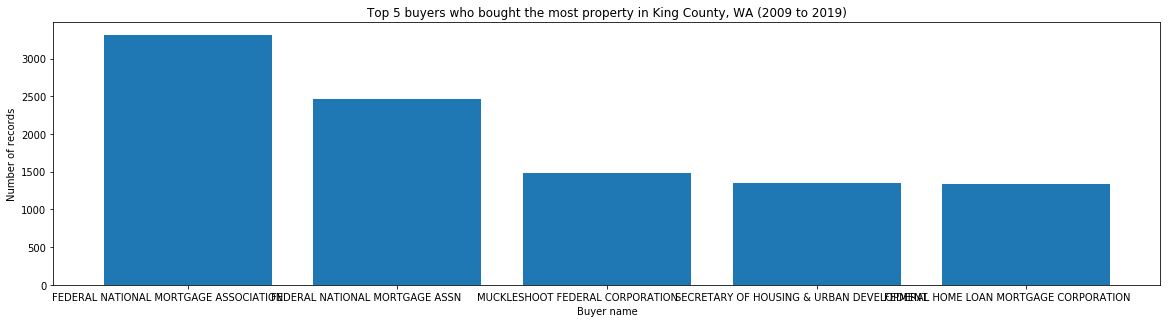

In [53]:
# create a figure and one plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

# place data (arranged in descending order) in a bar chart
# where the x-axis is the top 5 buyers and
# the y-axis is number of properties each buyer has purchased
ax.bar(x=[buyer[0] for buyer in buyer_count[0:5]],
        height=[buyer[1] for buyer in buyer_count[0:5]])

# set axis labels
ax.set_xlabel("Buyer name")
ax.set_ylabel("Number of records")

# give the bar chart a title
ax.set_title("Top 5 buyers who bought the most property in King County, WA (2009 to 2019)")

# save a copy of the figure as a PNG
fig.savefig("visuals/raw_buyer_count_over_time.png",
            dpi=150,
            bbox_inches="tight")

# display bar chart clearly
fig.tight_layout()

It looks like the Federal National Morgage Association bought the most property between 2009 and 2019.